In [1]:
from graph import Node, MLP
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "UD"})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(
            name=uid,
            label="{ %s | data %.2f | grad %.3f  }" % (n.label, n.data, n._grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [2]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
y = n(x)

In [3]:
for l in n.get_layers():
    for p in l.parameters():
        print(p.data)
    print()

0.7015179925007085
-0.9863528689398668
-0.2563901852213277
-0.12624157487002918
0.9445393840931691
0.8936563927656793
-0.9868799319613462
-0.23889026909436595
0.018412363688518507
-0.08364481141311741
0.4875838358800768
0.6549420511070445
0.23655574432292847
0.07335125510539986
0.6965621005642577
-0.06485642524090052

-0.8957748105726855
0.33372335679287835
0.12896694487523774
-0.48231737634613037
0.5332334055065124
0.830269342277596
-0.9175167650230545
0.20897662308512777
0.41836420369257366
-0.032759968675625695
-0.40515142413488725
0.32911469292916795
0.38266321168562056
-0.6967527109300364
-0.6400211290950353
0.39054419185868494
0.4914510365369682
0.4988730528741394
0.43697917958678345
-0.13379929020172754

0.8861984839261849
0.12915347373881025
0.08596528026031636
0.3536517173071845
-0.01857665443791756



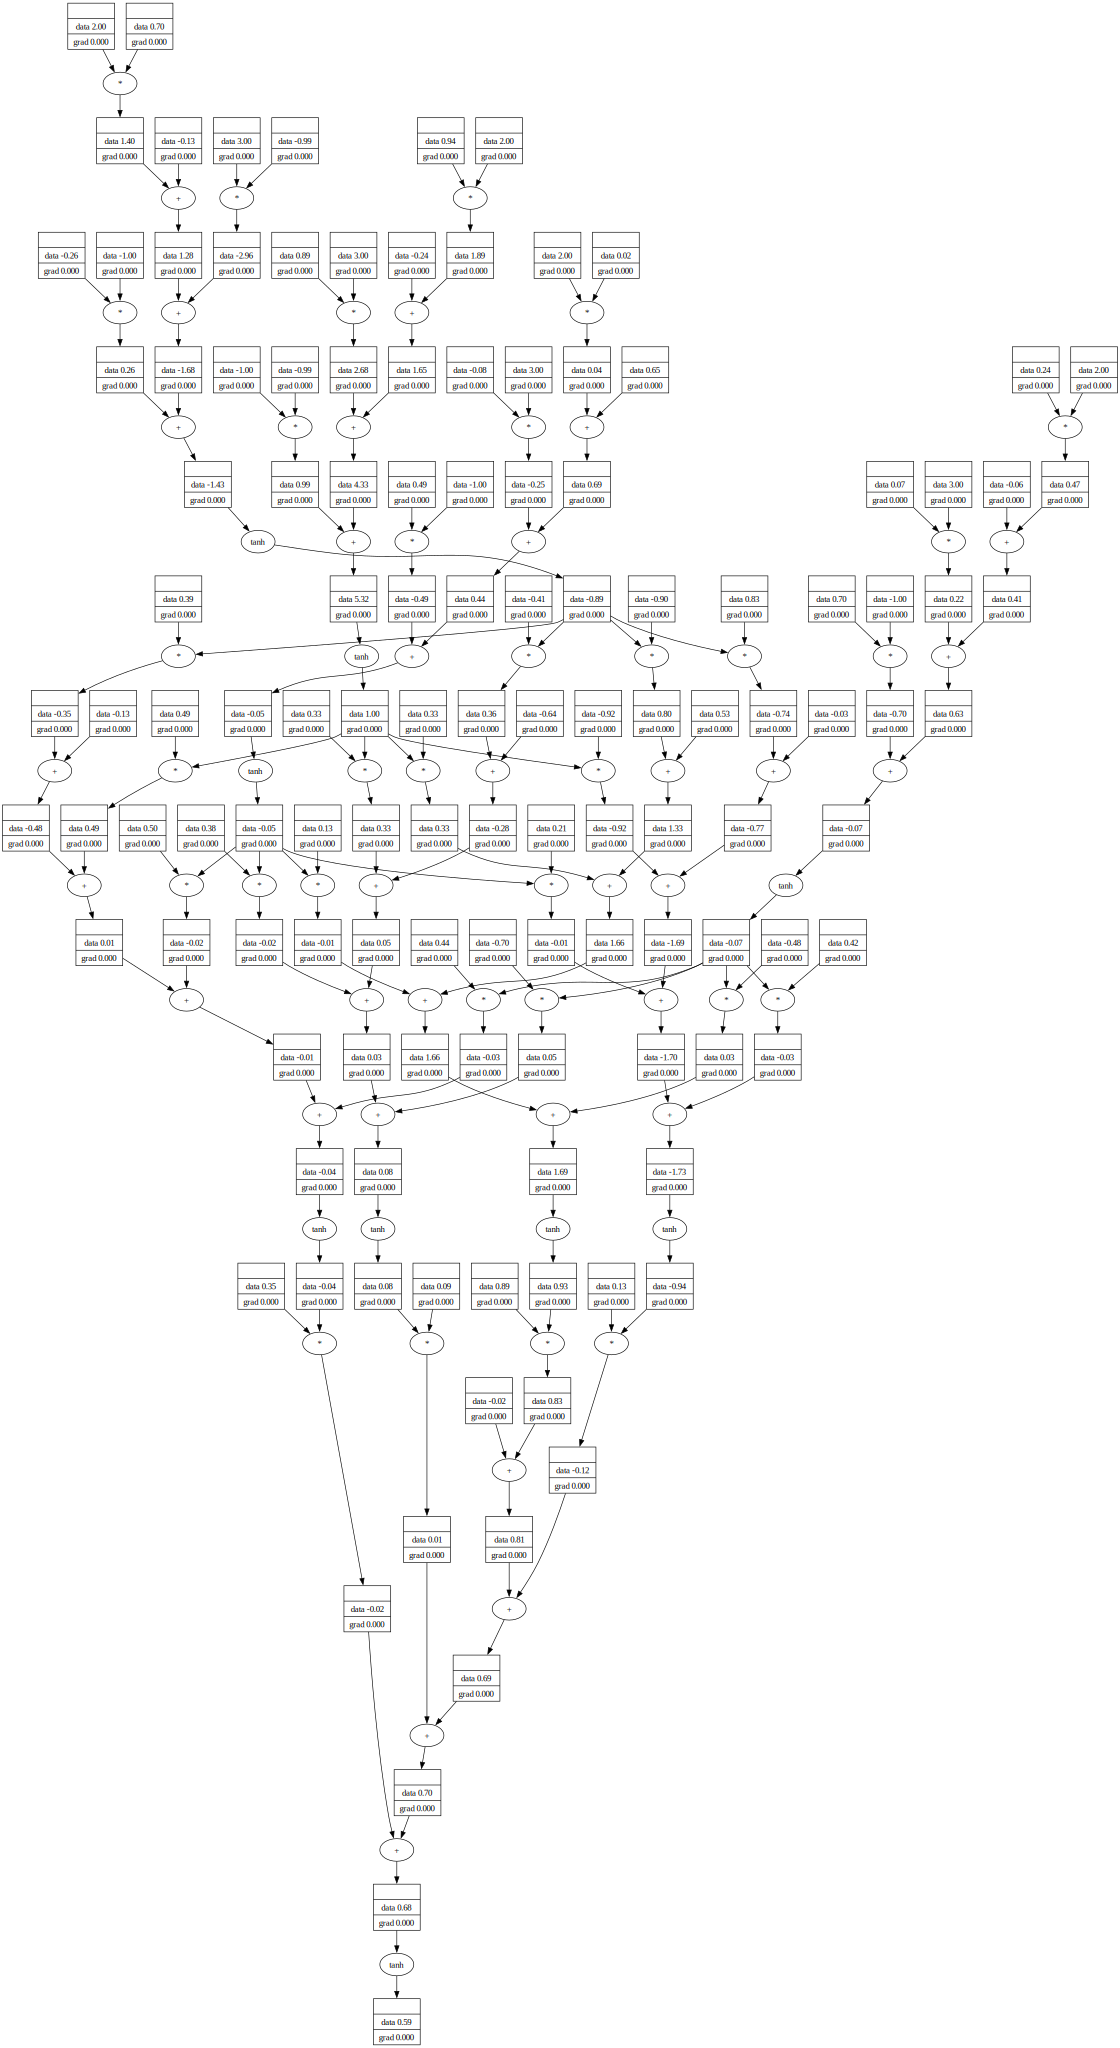

In [4]:
display(draw_dot(y))

In [5]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [6]:
# Instantiate the NN
n = MLP(3, [4, 4, 1])
n(x)

Node(data=0.003852925611940444, label=, grad=0.0)

In [7]:
# Forward pass
ypred = [n(x) for x in xs]
ypred

[Node(data=0.003852925611940444, label=, grad=0.0),
 Node(data=-0.5103539603541374, label=, grad=0.0),
 Node(data=-0.2632930044076547, label=, grad=0.0),
 Node(data=0.45173604982673743, label=, grad=0.0)]

In [8]:
# loss
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
loss

Node(data=2.0753927943670574, label=, grad=0.0)

In [9]:
# backprop
for p in n.parameters():
    p._grad = 0.0
loss.backward()

In [10]:
# update
for p in n.parameters():
    p.data += -0.05 * p._grad

In [11]:
# Forward pass
ypred = [n(x) for x in xs]
ypred

[Node(data=0.5805799974715973, label=, grad=0.0),
 Node(data=-0.6784287371478493, label=, grad=0.0),
 Node(data=-0.05781669955534092, label=, grad=0.0),
 Node(data=0.7103835769769954, label=, grad=0.0)]

In [12]:
# loss
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
loss

Node(data=1.2509082597346828, label=, grad=0.0)

In [13]:
# backprop
for p in n.parameters():
    p._grad = 0.0
loss.backward()

# update
for p in n.parameters():
    p.data += -0.05 * p._grad

In [14]:
# Forward pass
ypred = [n(x) for x in xs]
print(ypred)
# loss
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
print(loss)

[Node(data=0.429159904626051, label=, grad=0.0), Node(data=-0.8116507365259074, label=, grad=0.0), Node(data=-0.493430025223446, label=, grad=0.0), Node(data=0.6932751834784616, label=, grad=0.0)]
Node(data=0.7120271119530623, label=, grad=0.0)


In [15]:
for k in range(10):
    print(k)
    # forward pass
    ypred = [n(x) for x in xs]
    print(ypred)
    loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
    print(loss)
    print()

    # backward pass
    for p in n.parameters():
        p._grad = 0.0
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.05 * p._grad


0
[Node(data=0.429159904626051, label=, grad=0.0), Node(data=-0.8116507365259074, label=, grad=0.0), Node(data=-0.493430025223446, label=, grad=0.0), Node(data=0.6932751834784616, label=, grad=0.0)]
Node(data=0.7120271119530623, label=, grad=0.0)

1
[Node(data=0.6505812383515149, label=, grad=0.0), Node(data=-0.8431268206613873, label=, grad=0.0), Node(data=-0.4878740794026016, label=, grad=0.0), Node(data=0.7951535295327814, label=, grad=0.0)]
Node(data=0.45093770039837533, label=, grad=0.0)

2
[Node(data=0.6622632217139093, label=, grad=0.0), Node(data=-0.8726528290707355, label=, grad=0.0), Node(data=-0.6130289203491481, label=, grad=0.0), Node(data=0.8155387364264042, label=, grad=0.0)]
Node(data=0.3140560075960689, label=, grad=0.0)

3
[Node(data=0.705948741411389, label=, grad=0.0), Node(data=-0.8886088944155824, label=, grad=0.0), Node(data=-0.6637657226362452, label=, grad=0.0), Node(data=0.8414735574026547, label=, grad=0.0)]
Node(data=0.23705824335776082, label=, grad=0.0)

4

In [16]:
ypred

[Node(data=0.8207342192858941, label=, grad=-0.35853156142821185),
 Node(data=-0.9286911743184589, label=, grad=0.14261765136308213),
 Node(data=-0.8065369432705293, label=, grad=0.38692611345894146),
 Node(data=0.9061496766390158, label=, grad=-0.1877006467219684)]

In [17]:
print(loss)

Node(data=0.08345700626919003, label=, grad=1)
